In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time, datetime
#%matplotlib inline

In [3]:
path = "./dataset/fcc-forum-pageviews.csv"
df = pd.read_csv(path)

df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [5]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [6]:
#  filtering out days when the page views were in the top 2.5% of the dataset 
# or bottom 2.5% of the dataset.

above_threshold = np.percentile(df.value, 100-2.5) 
below_threshold = np.percentile(df.value, 2.5)
df = df[ (df.value < above_threshold) & (df.value > below_threshold) ]
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


In [37]:
df["date"] = pd.to_datetime(df["date"])

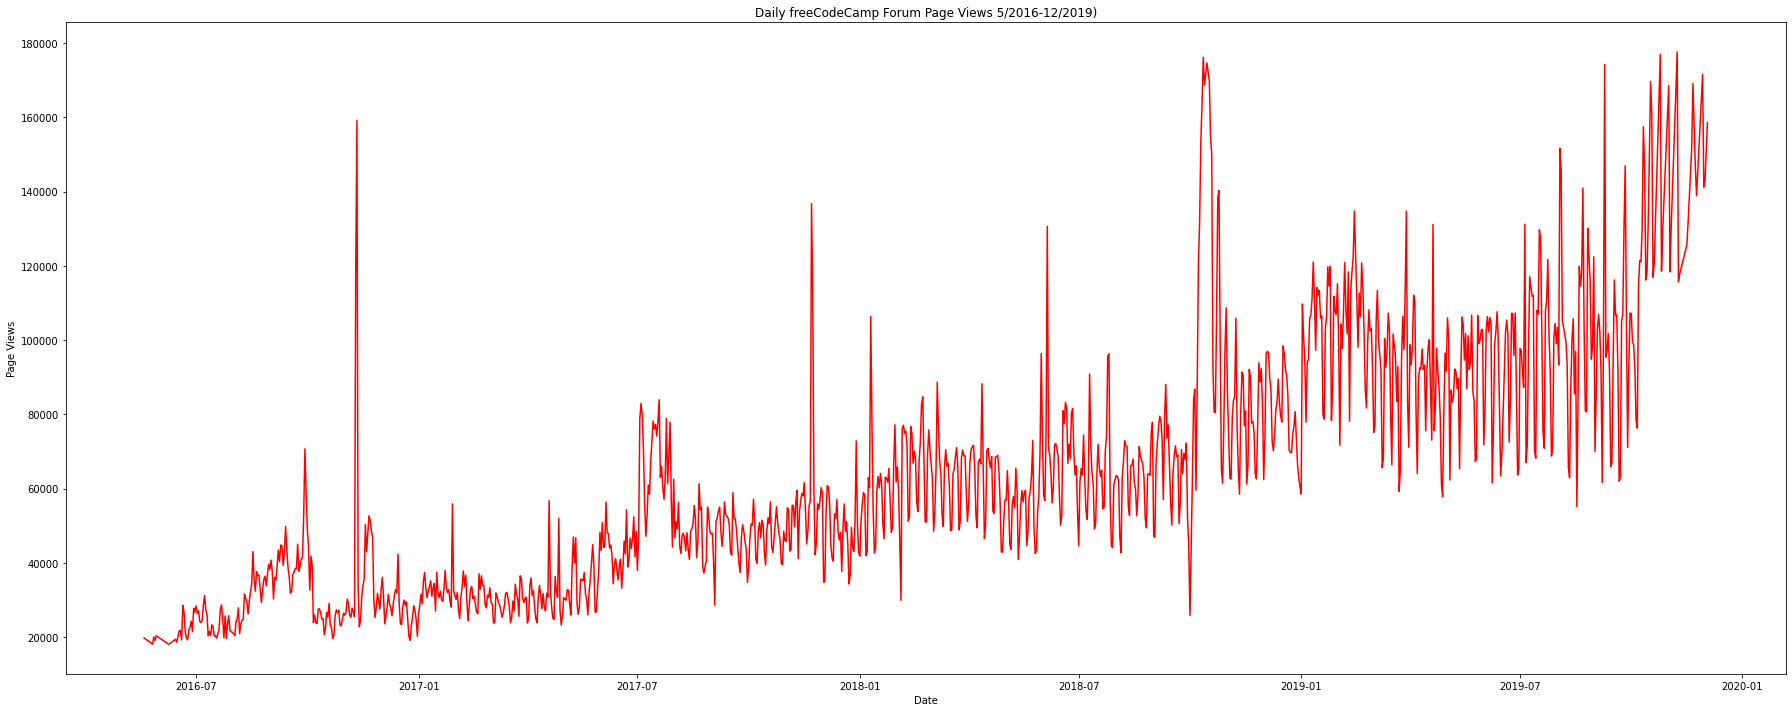

In [40]:
dates = [datetime.date(2016, 7, 1), datetime.date(2017, 1, 1),
         datetime.date(2017, 7, 1), datetime.date(2018, 1, 1),
         datetime.date(2018, 7, 1), datetime.date(2019, 1, 1),
         datetime.date(2019, 7, 1), datetime.date(2020, 1, 1)]

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)

ax1.plot(df.date, df.value, c="red")
ax=plt.gca()
# Find the days in the data
months = mdates.MonthLocator((7, 1))
# Format the days in the data
days_fmt = mdates.DateFormatter('%Y-%m')
# Set xaxis to use the day locator
ax.xaxis.set_major_locator(months)
# Set xaxis to use the day formatter
ax.xaxis.set_major_formatter(days_fmt)

ax1.set_yticks(np.arange(20000, 180001, 20000))

ax1.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Page Views")
fig.tight_layout()

In [67]:
# since df.date is timestamp
df["year"] = pd.DatetimeIndex(df.date).year
df["month"] = pd.DatetimeIndex(df.date).month_name()



ValueError: No axis named month for object type DataFrame

In [77]:
df[df.month == "January"]

,date,value,year,month
237,2017-01-01,26185,2017,January
238,2017-01-02,28560,2017,January
239,2017-01-03,31525,2017,January
240,2017-01-04,28955,2017,January
241,2017-01-05,35024,2017,January
...,...,...,...,...
993,2019-01-27,86596,2019,January
994,2019-01-28,111784,2019,January
995,2019-01-29,107881,2019,January
996,2019-01-30,106844,2019,January
